<a href="https://colab.research.google.com/github/elephantcastle/Codewars-Solutions-Scraper/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import random

import numpy as np
import matplotlib
from matplotlib import pyplot

def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pyplot.scatter(X, y)
    pyplot.xlabel('number of rooms')
    pyplot.ylabel('prices')

## Basic Definitions
**Artificial intelligence**: The set of all tasks in which a computer can make decisions

**Machine learning**: The set of all tasks in which a computer can make decisions based on data

**Deep learning**: The field of machine learning that uses certain objects called neural networks

**Remember-formulate-predict framework**: try to make decision based on past data, goal of machine learning

**Model**: A set of rules that represent our data and can be used to make predictions
prediction: it is the guess the model makes about our data; it tries to guess the labels of the data

**Algorithm**: A procedure, or a set of steps, used to solve a problem or perform a computation. In this book, the goal of an algorithm is to build a model.

**Data**: information. If our data is in a table the each row is a data point; it can be labelled or unlabeled
Features: properties/ characteristics of the data. If our data is in a table, the features are the columns of the table.
Labels: feature we are trying to predict based on others available to us; it depends on the specific problem at hand
Dimension: numbers of columns in the table

The main three families of machine learning models are
- reinforcement learning.
- Supervised learning: works with labelled data; the goal is to predict the labels; image without label → it will try to guess whether it is a cat or a dog; the label of the data point. 2 types:
regression models: predict numerical data. The output is a number, such as the weight of the animal
classification models: predict categorical data. The output is a category, or a state, such as the type of animal (cat or dog)

- Unsupervised learning: unlabeled data; it can still group similar data together; types:
clustering algorithms: groups data into clusters based on similarity
dimensionality reduction: simplify our data and faithfully describe it with fewer features
generative algorithms: generate new data points that resemble the existing data (like deepfake)

Simplifying the problem/dataset

**Clustering**: branch of unsupervised machine learning → group the elements in our dataset into clusters where all the data points are similar; it reduces the number of rows in our data table

**Dimensionality reduction**: reduce amounts of labels; it simplifies them by using macro categories; it reduces the number of columns in our data table

**Matrix factorization and singular value decomposition**: split matrix in products of smaller ones

# Regression Model

`Price = 100 + 50(Number of rooms) + (Small error)`

`y' = b + 50*w + e`

**weights**: each feature is multiplied by a corresponding factor. These factors are the weights; high weight → feature is important in determining the price of the house; indicates the correlation with the price

**bias**: As you can see, the formula corresponding to the model has a constant that is not attached to any of the features. This constant is called the bias.

**learning rate**, l: A very small number that we pick before training our model. This number helps us make sure our model changes in very small amounts by training.

**training**: By tweaking w and b we can reach a model that returns better prices; where the error is smaller; this could be done by a “series of adjustments”; adding l(y – yˆ) to b and lr(y – yˆ) to w

**epoch**: each cycle of adjustment 

**error function/loss function**: measure the result of our adjustment; for linear models we get absolute error and the square error; it tells us when it is a good time to stop running improving iterations.

**gradient descent**: direction that if followed guarantees steeper decline in the loss function and reaching minimum; the weights are adjusted by adding w*(err)*l and bias by adding (err)*l
stochastic(adjust error for 1 point), mini-batch instead of calculating one point at the time we use small batches of data; reduce the error in that mini-batch as it would be too expensive or bad fitting otherwise, and batch gradient descent: entire set;

**Line of best fit**: with regression we can use straight line or polynomials; train a polynomial regression model is similar to the process of training a linear regression model

**parameters**: weights and biases; quantity that the model creates or modifies during the training process

**hyperparameters**: learning rate, the number of epochs, the degree (if considering a polynomial regression model); quantity that you set before the training process

**underfit or overfit**: if hyperparameters are set wrong; very simple models tend to underfit. Very complex models tend to overfit. It is memorising the data instead of learning it;

**testing**: use a subset of the data not for training but for testing the resulting model; 20/80 split; If the training error is low and the testing error is high, then it overfits; the split is necessary to avoid overfitting.
testing data to train our model or to make any decisions on the model or its hyperparameters. 

**validation** set: for making decisions on which model to use; the way to decide which model to use is to pick the one that has the smallest validation error.

60-20-20 or 80-10-10 split → training, validation, testing

**regularisation**: modifying the error function so that model complexity is taken into account; we want to decrease ⇒  Error = Regression error(square or abs error) + Regularisation term(L1 or L2)
L1 and L2 norm: measuring how big the coefficient are; this gives us an idea of the complexity; 
 
**Complexity vs performance** —> trying to make the model perform better may make it more complex, whereas trying to reduce the complexity of the model may make it perform worse. Coefficient on regularisation term to adjust importance of complexity; L1 regularisation is recommended when our dataset has numerous features, and we want to turn many of them into zero. L2 regularisation is recommended when our dataset has few features, and we want to make them small but not zero.


In [8]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

In [7]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

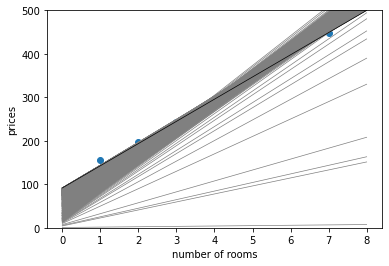

In [10]:
import random

# We set the random seed in order to always get the same results.
random.seed(0)

def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

In [6]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

Price per room: 50.65781332767556
Base price: 99.79504258184782


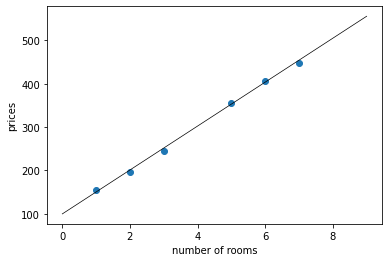

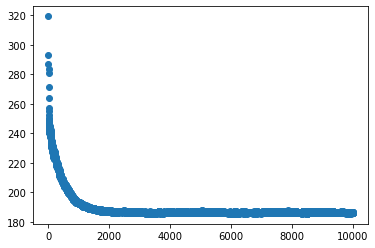

(50.65781332767556, 99.79504258184782)

In [11]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

# Classification models
Classification models are similar to regression models, in that their aim is to predict the labels of a dataset based on the features. The difference is that regression models aim to predict a number, whereas classification models aim to predict a state or a category.

Perceptron: linear classifier, its purpose is to classify the points as best as possible

This is a perceptron based on n words; the step function outputs 0,1 based if prediction fits or not.
yˆi = step(w1x1(i) + w2x2(i) + … +wnxn(i) + b).   b the bias is negative if we expect by default that no data returns a negative value else the opposite.

error function: to compare the classifiers; we need smth that tells us how good it is(distance from line good idea but too difficult; number of success/errors doesn’t tell us by how much we err) so we use error function that takes the average abs score;
We adjust biases and weights but how much they appear(features[i] ) and relative error (label-pred)

Many equations work for the line separating the AND dataset. We’ll pick the line with equation x1 + x2 – 1.5. Thus, the perceptron that classifies this dataset makes the prediction yˆ = step(x1 + x2 – 1.5).

Similarly, many equations work for the OR dataset, and we pick the line with equation
x1 + x2 – 0.5. The equation for the prediction is yˆ = step(x1 + x2 – 0.5).

Notice that the dataset for XOR is impossible to separate using a single line. Thus, there is no perceptron model that perfectly fits the XOR dataset. However, a combination of perceptrons can separate this dataset.

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

# Logistic classifier

logistic classifier: assigns a score from 0 to 1 to each sentence, the happier a sentence is, the higher the score it receives